# Estimating car prices using machine learning(k-nearest neighbors,Train/Test validation,K-Fold validation)

### Purpose:
##### Determining how much the car prices depend on certain car features and how accuratly we can use these features to estimate the car prices.

## Reading the data into dataframe object

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars=pd.read_csv("cars.data",names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Replacing missing values and rescaling numeric values

In [3]:
cars=cars.replace(to_replace='?',value=np.nan)

In [4]:
cars[["normalized-losses","bore","stroke","horsepower","peak-rpm","price"]]=cars[["normalized-losses","bore","stroke","horsepower","peak-rpm","price"]].astype(float)
cars.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### Findings
It seems that normalized-losses column contains the most missing values. There are some other column as well that have fewer missing values. We can replace missing values in normalized-losses column with column average while dropping rows of the columns having fewer missing values.

In [5]:
cars[["normalized-losses"]]=cars[["normalized-losses"]].fillna(cars[["normalized-losses"]].mean())
cars=cars.dropna()
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
cols=["symboling","normalized-losses","wheel-base","length","width","height","curb-weight","engine-size","stroke","compression-rate","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
for feature_name in cols:
    max_value = cars[feature_name].max()
    min_value = cars[feature_name].min()
    cars[feature_name] = (cars[feature_name] - min_value) / (max_value - min_value)

### Creating and testing a trained model

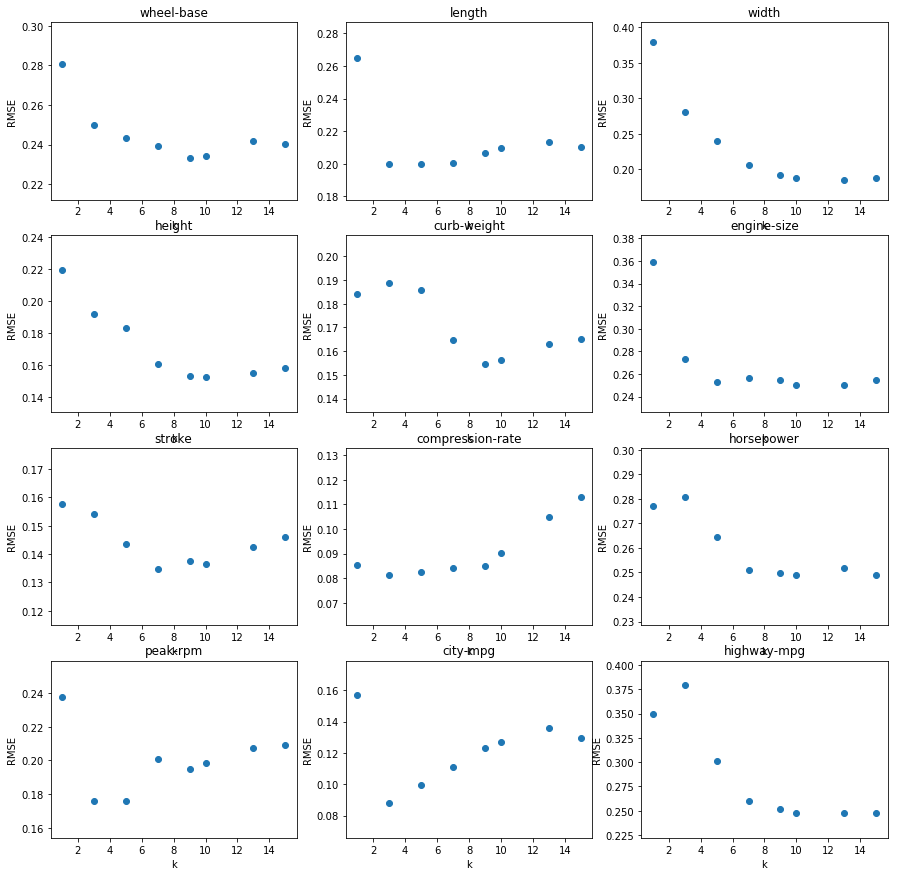

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
def knn_train_test(training,target,df,k):
    rmse=[]
    test=df[0:(np.floor(df.shape[0]/4)).astype(int)]
    train=df[np.floor(df.shape[0]/4).astype(int):]
    for value in k:
        knn=KNeighborsRegressor(n_neighbors=value,algorithm="auto")
        knn.fit(train[[training]],train[[target]])
        predicted=knn.predict(test[[training]])
        rmse.append(np.sqrt(mean_squared_error(test[[target]],predicted)))
    return rmse
k=[1,3,5,7,9,10,13,15]
cols1=["wheel-base","length","width","height","curb-weight","engine-size","stroke","compression-rate","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
fig=plt.figure(figsize=(15,15))
for idx in range(len(cols1)-1):
    rmses=knn_train_test(cols[idx],"price",cars,k)
    ax=fig.add_subplot(4,3,idx+1)
    plt.scatter(k, rmses)
    ax.set_title(cols1[idx])
    ax.set_xlabel("k")
    ax.set_ylabel("RMSE")

### Predicting using best five features from above plots and constant k value

In [133]:
def knn_train_test(training,target,df):
    rmse=None
    test=df[0:(np.floor(df.shape[0]/4)).astype(int)]
    train=df[np.floor(df.shape[0]/4).astype(int):]
    knn=KNeighborsRegressor(n_neighbors=9,algorithm="auto")
    knn.fit(train[training],train[[target]])
    predicted=knn.predict(test[training])
    rmse=np.sqrt(mean_squared_error(test[[target]],predicted))
    return rmse
columns=["curb-weight","length","width","engine-size","horsepower"]
rmses1=knn_train_test(columns[0:2],"price",cars)
rmses2=knn_train_test(columns[0:3],"price",cars)
rmses3=knn_train_test(columns[0:4],"price",cars)
print(rmses1)
print(rmses2)
print(rmses3)


0.132749472276
0.141889264803
0.137691522433


### Tweaking k on the above 3 best models

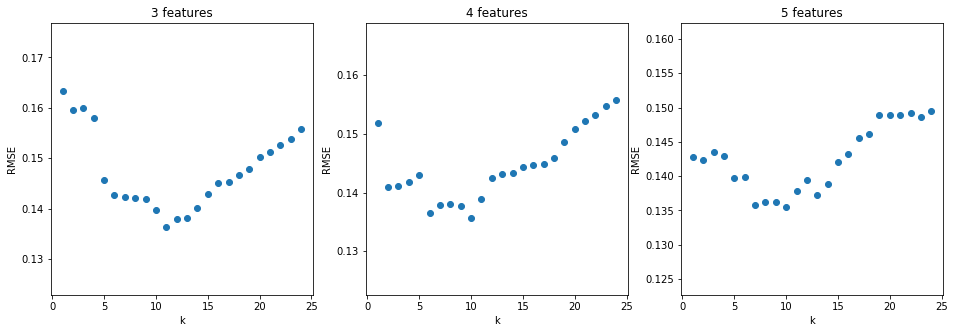

In [161]:
def knn_train_test(training,target,df,k):
    rmse=[]
    test=df[0:(np.floor(df.shape[0]/4)).astype(int)]
    train=df[np.floor(df.shape[0]/4).astype(int):]
    for value in k:
        knn=KNeighborsRegressor(n_neighbors=value,algorithm="auto")
        knn.fit(train[training],train[[target]])
        predicted=knn.predict(test[training])
        rmse.append(np.sqrt(mean_squared_error(test[[target]],predicted)))
    return rmse
k=list(range(1,25))
columns=[["curb-weight","length","width"],["curb-weight","length","width","engine-size"],["curb-weight","length","width","engine-size","horsepower"]] 
fig=plt.figure(figsize=(16,5))
for idx in range(len(columns)):
    rmses=knn_train_test(columns[idx],"price",cars,k)
    ax=fig.add_subplot(1,3,idx+1)
    plt.scatter(k, rmses)
    ax.set_title(str(3+idx)+" features")
    ax.set_xlabel("k")
    ax.set_ylabel("RMSE")

## Findings:
K=11 is the optimal value for 3 featured model while in case of other two models,K=10 is the optimal value. Out of the three models, 3 featured model has the least Root mean square error(RMSE) value at around K=11.
Reason behind the difference between the optimal-K values of the models is that increase in the number of features results in the increase in variance and decrease in bais. Therefore, we have to face tradeoff between these to quantities.Therefore,we always need an appropriate combination between these quantities.

## Using K-Fold Cross Validation Technique

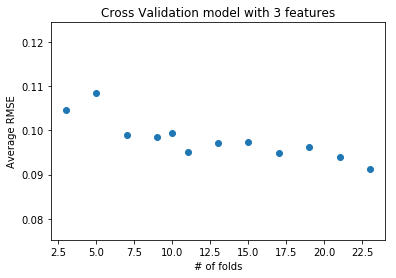

In [162]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]
avg_rmse=[]
for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, cars[columns[0]], cars["price"], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse.append(np.mean(rmses))
plt.scatter(num_folds, avg_rmse)
plt.title("Cross Validation model with 3 features")
plt.xlabel("# of folds")
plt.ylabel("Average RMSE")

# Findings:
Clearly,K=11 is the optimal value with 3 features.